In [1]:
import os
import pandas as pd

os.chdir(r"D:\data science\first Project")

df = pd.read_csv("quality_dataset.csv")





In [2]:
df.head()

,City,Date,PM2.5,PM10,NO2,SO2,CO,O3,AQI
0,Delhi,01-01-2020,350,500,80,20,1.8,10,450
1,Mumbai,01-01-2020,120,200,40,12,1.2,20,150
2,Kolkata,01-01-2020,200,300,50,15,1.5,18,250
3,Chennai,01-01-2020,90,120,35,10,0.9,25,120
4,Bengaluru,01-01-2020,60,80,25,8,0.6,30,90


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    10 non-null     object 
 1   Date    10 non-null     object 
 2   PM2.5   10 non-null     int64  
 3   PM10    10 non-null     int64  
 4   NO2     10 non-null     int64  
 5   SO2     10 non-null     int64  
 6   CO      10 non-null     float64
 7   O3      10 non-null     int64  
 8   AQI     10 non-null     int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 852.0+ bytes


In [4]:
df.describe()

,PM2.5,PM10,NO2,SO2,CO,O3,AQI
count,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,167.70000,244.700000,47.200000,13.60000,1.240000,21.200000,217.500000
std,110.97352,161.578361,20.573986,4.64758,0.460555,6.972964,140.223037
min,60.00000,80.000000,25.000000,8.00000,0.600000,10.000000,90.000000
25%,91.25000,121.250000,35.500000,10.25000,0.912500,18.250000,122.500000
50%,125.00000,205.000000,41.000000,12.50000,1.250000,20.500000,155.000000
75%,207.50000,307.500000,51.500000,15.75000,1.575000,25.750000,257.500000
max,360.00000,520.000000,85.000000,22.00000,1.900000,31.000000,470.000000


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

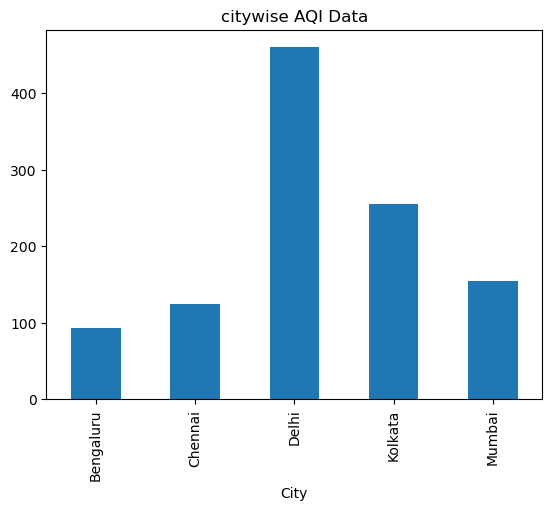

In [6]:
import matplotlib.pyplot as plt

df.groupby("City")["AQI"].mean().plot(kind ="bar")
plt.title("citywise AQI Data")
plt.xlabel("City")
plt.ylable("AQI")
plt.show()

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])  # convert to date type

for city in df["City"].unique():
    city_data = df[df["City"] == city]
    plt.plot(city_data["Date"], city_data["AQI"], marker="o", label=city)

plt.title("AQI Trend Over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.show()


In [7]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Pollutants and AQI")
plt.show()


ValueError: could not convert string to float: 'Delhi'

<Figure size 800x500 with 0 Axes>

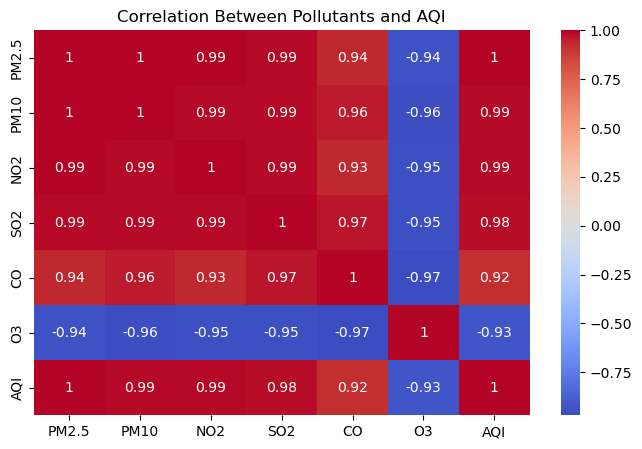

In [10]:
import seaborn as sns

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Pollutants and AQI")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Select features (input)
X = df[["PM2.5", "PM10", "NO2", "SO2", "CO", "O3"]]

# Target (output)
y = df["AQI"]

# Split data into Train & Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create model
model = RandomForestRegressor()

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(34.61666666666666, 0.9257245535714286)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance scores
importance = model.feature_importances_

# Feature names
features = X.columns

# Plot bar graph
plt.figure(figsize=(8,5))
plt.bar(features, importance)
plt.title("Feature Importance - Effect of Pollutants on AQI")
plt.ylabel("Importance Score")
plt.xlabel("Pollutants")
plt.show()
